In [1]:
#  0->normal
# 1->abnormal
# true positive true negative false positive false negative used in binary classfication
#multiclass classification
#multilabel classification->used in deep learning
# imbalanced classification

### DataSet

In [2]:
# Dataset:- Social_Network_Ads.csv

### Import the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


### Separate the input and output data

In [7]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

### Output Variable Analysis 

In [8]:
set(y)

{0, 1}

In [9]:
np.unique(y)

array([0, 1], dtype=int64)

C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


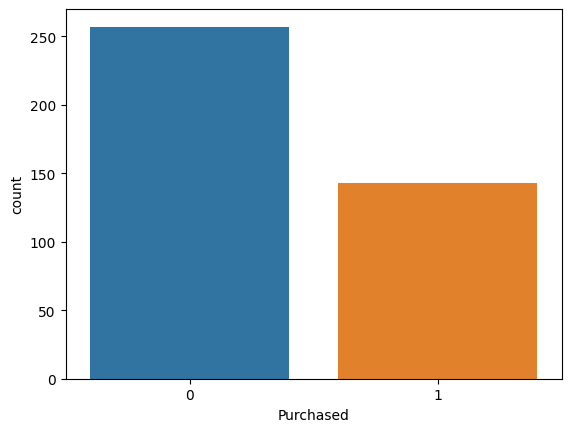

In [10]:
#parameter of acess neighbour
sns.countplot(x = y);

In [11]:
#series function
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [12]:
from collections import Counter
Counter(y)

Counter({0: 257, 1: 143})

In [13]:
y.value_counts()[0] / len(y) *100, y.value_counts()[1]/len(y) *100

(64.25, 35.75)

### Input data Analysis

In [14]:
x.describe() #Mean & Median are same 

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


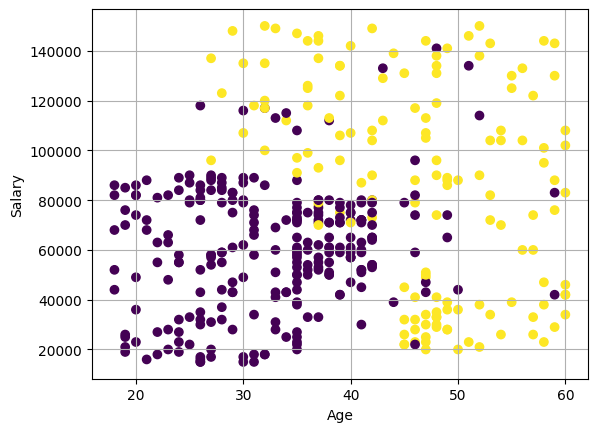

In [15]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y);

C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RITESH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

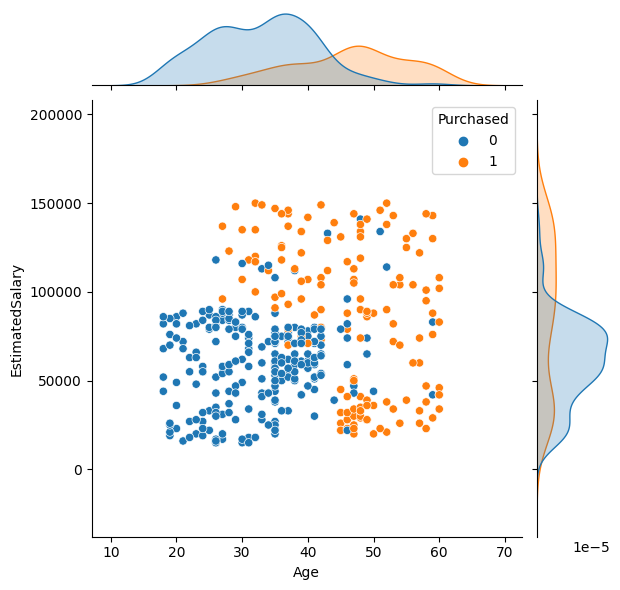

In [16]:
sns.jointplot(x = 'Age', y='EstimatedSalary', data=df, hue='Purchased');

### Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x)

In [18]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


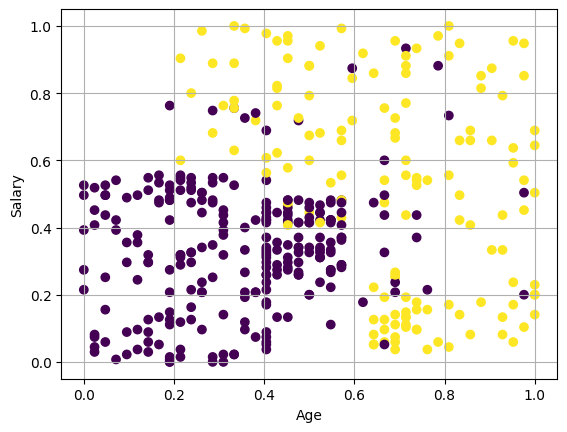

In [19]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y); 

### Cross Validation

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [21]:
x_train.shape

(300, 2)

In [22]:
x_test.shape

(100, 2)

In [23]:
x_train

,Age,EstimatedSalary
250,44.0,39000.0
63,32.0,120000.0
312,38.0,50000.0
159,32.0,135000.0
283,52.0,21000.0
...,...,...
323,48.0,30000.0
192,29.0,43000.0
117,36.0,52000.0
47,27.0,54000.0


### Build the Logistic Regression model

In [24]:
#import the class
from sklearn.linear_model import LogisticRegression

In [25]:
#Create the object
classifier = LogisticRegression()

In [26]:
#Train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

### Predict on the test data

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### Evaluate the performance

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

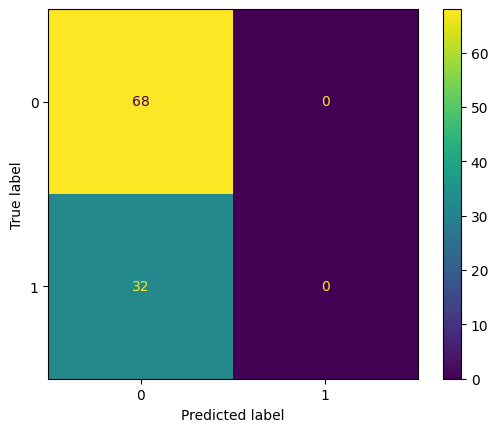

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred); #Accuracy=89%

In [31]:
accuracy_score(y_test, y_pred)

0.68

In [32]:
confusion_matrix(y_test, y_pred)

array([[68,  0],
       [32,  0]], dtype=int64)

In [59]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



C:\Users\RITESH\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RITESH\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RITESH\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [61]:
#Recall -> class Accuracy - 0
r0 = 66/67
r0

0.9850746268656716

In [62]:
#Recall -> class Accuracy - 1
r1 = 22/32
r1

0.6875

In [63]:
#Precision-Class0-PPV
p0=67/77
p0

0.8701298701298701

In [64]:
#negative pradictive value
p1 = 22/23
p1

0.9565217391304348

In [65]:
# f1-score ->avg(precision + recall)
new1 = [[23, 25000]]
new2 = [[48, 123000]]

In [66]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [67]:
classifier.predict(scaler.transform(new1))

array([0], dtype=int64)

In [68]:
classifier.predict(scaler.transform(new2))

array([0], dtype=int64)

In [69]:
classifier.predict_proba(scaler.transform(new1))

array([[0.50000004, 0.49999996]])

In [70]:
classifier.predict(scaler.transform(new2))

array([0], dtype=int64)